In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [8]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [9]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [10]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [11]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



c:\Users\siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830 (3.25 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 554 (2.17 KB)

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.3105 - val_accuracy: 0.8519 - val_loss: 0.3440
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8636 - loss: 0.3245 - val_accuracy: 0.8512 - val_loss: 0.3464
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8758 - loss: 0.3097 - val_accuracy: 0.8506 - val_loss: 0.3463
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8743 - loss: 0.3108 - val_accuracy: 0.8506 - val_loss: 0.3460
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8690 - loss: 0.3234 - val_accuracy: 0.8500 - val_loss: 0.3480
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8714 - loss: 0.3145 - val_accuracy: 0.8506 - val_loss: 0.3461
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.3322 - val_accuracy: 0.8506 - val_loss: 0.3472
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3214 - val_accu

In [30]:
model.layers[0].get_weights()

[array([[ 0.09487644,  0.48308098, -0.03995384, -0.12122548,  0.02826512,
          0.07979749, -0.7412264 ,  0.07870861, -0.20384564,  0.15297684,
          0.12768197],
        [-0.10621102,  0.7869359 ,  0.19358505, -0.14617418,  0.16333576,
         -0.85650855,  0.9708568 ,  0.38201818, -0.9389052 , -1.0483556 ,
         -0.7035087 ],
        [-0.8723239 ,  0.20986508, -0.14881976, -0.2833477 , -0.12491229,
         -0.05749889, -0.14629272, -0.16359676,  0.28451958, -0.33950543,
         -0.191221  ],
        [ 0.10181117, -0.5843733 ,  0.21762148, -0.27917513, -0.6391501 ,
         -0.07064155, -0.24543637, -0.3991426 ,  0.1965822 , -0.56604695,
         -0.17438732],
        [-0.14425167,  0.01360158,  1.1945888 , -0.05457713, -1.215857  ,
          0.09740134, -0.15606472, -0.04258113,  0.10741697,  0.10443372,
          0.04029644],
        [ 0.7895753 ,  0.17941569,  0.05841434, -0.03842404,  0.06235052,
          0.05314155,  0.13307117,  0.32897612,  0.1389054 , -0.1877372

In [31]:
model.layers[1].get_weights()

[array([[-0.14513218, -0.59677094,  0.61709034, -0.01647655, -0.33908844,
          0.14695597, -0.5267672 ,  0.47626296, -0.41357383, -0.517515  ,
         -0.63369566],
        [-0.46375495, -1.7727724 ,  1.0392711 ,  0.57187366, -0.63957727,
         -0.01938421, -0.26690847, -0.74342763,  0.31779784,  0.39120758,
          0.4759635 ],
        [ 0.57448494,  1.0383343 , -0.26270998, -0.00550428, -0.04682934,
          1.2623731 ,  0.5763686 , -0.91723514,  0.76353484,  0.41539252,
         -0.43899685],
        [ 0.70200944, -0.48246175,  0.41054934, -0.13440913,  0.5117973 ,
         -0.13502945, -0.37569737, -1.0588492 ,  0.02872814, -0.0256723 ,
          0.67135805],
        [ 0.64097077, -0.4096987 , -0.47044224, -0.14428188, -0.24783543,
         -0.4178401 ,  0.21673054, -0.8245014 ,  0.51198846, -0.02857227,
         -0.6319246 ],
        [-0.4269437 , -0.7223268 ,  0.39981237,  0.10897494,  0.20221472,
         -0.47446188,  0.91137815, -0.09776285, -0.77316314,  0.4002196

In [32]:
model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.07330795],
       [0.06461415],
       [0.09781687],
       ...,
       [0.01504503],
       [0.03507655],
       [0.2787606 ]], dtype=float32)

In [33]:
y_log=model.predict(x_test)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

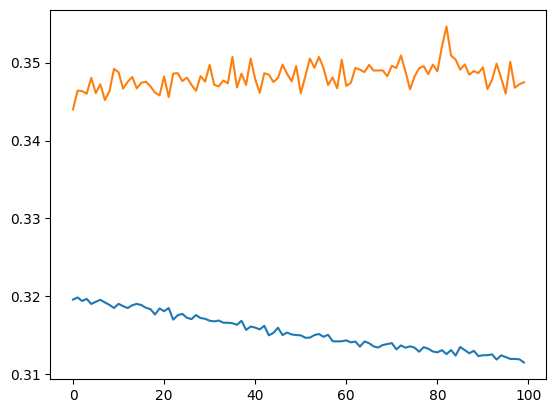

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])